# Jamboree Education - Linear Regression (Case Study)

Jamboree has helped thousands of students like you make it to top colleges abroad. Be it GMAT, GRE or SAT, their unique problem-solving methods ensure maximum scores with minimum effort.

They recently launched a feature where students/learners can come to their website and check their probability of getting into the IVY league college. This feature estimates the chances of graduate admission from an Indian perspective.

Our analysis will help Jamboree in understanding what factors are important in graduate admissions and how these factors are interrelated among themselves. It will also help predict one's chances of admission given the rest of the variables.

**Column Profiling:**

* **Serial No.:** This column represents the unique row identifier for each applicant in the dataset.

* **GRE Score:** This column contains the GRE (Graduate Record Examination) scores of the applicants, which are measured on a scale of 0 to 340.

* **TOEFL Score:** This column includes the TOEFL (Test of English as a Foreign Language) scores of the applicants, which are measured on a scale of 0 to 120.

* **University Rating:** This column indicates the rating or reputation of the university that the applicants are associated with.
  * The rating is based on a scale of 0 to 5, with 5 representing the highest rating.

* **SOP:** This column represents the strength of the applicant's statement of purpose, rated on a scale of 0 to 5, with 5 indicating a strong and compelling SOP.

* **LOR:** This column represents the strength of the applicant's letter of recommendation, rated on a scale of 0 to 5, with 5 indicating a strong and compelling LOR.

* **CGPA:** This column contains the undergraduate Grade Point Average (GPA) of the applicants, which is measured on a scale of 0 to 10.

* **Research:** This column indicates whether the applicant has research experience (1) or not (0).

* **Chance of Admit:** This column represents the estimated probability or chance of
admission for each applicant, ranging from 0 to 1.

In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statistics

import warnings
warnings.simplefilter('ignore')

In [2]:
# get the dataset (csv file) from the link

!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv

--2024-06-07 15:31:29--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/839/original/Jamboree_Admission.csv
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.97, 3.162.130.111, 3.162.130.189, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.97|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [text/plain]
Saving to: ‘Jamboree_Admission.csv.1’

Jamboree_Admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2024-06-07 15:31:29 (138 MB/s) - ‘Jamboree_Admission.csv.1’ saved [16176/16176]



In [3]:
# read the csv file

df=pd.read_csv("Jamboree_Admission.csv")

## Basic data cleaning and exploration

In [4]:
df.shape

(500, 9)

**Insights:** Dataset has 500 rows and 9 columns.


In [5]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [7]:
# Remove serial number as this feature is not required for prediction

df.drop(columns=['Serial No.'], inplace=True)

In [8]:
# Renaming the features LOR and Chance of Admit as their names ends with extra space

df.rename(columns={'LOR ':'LOR', 'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [9]:
df.shape

(500, 8)

In [10]:
# Basic Information about the Dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


**Insights/Conclusion:**
The datatype of all features is either `integer` or `float`.

In [11]:
df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Insights/Conclusion:**
The dataset contains no null or missing values across all features.

In [12]:
df.nunique()

GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

**Insights/Conclusion:**
University Rating, SOP, LOR and Research are categorical features due to less unique count, while the rest of the features are numerical.

In [13]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


**Insights/Conclusion:**

* **GRE Scores:** Range from 290 to 340 and mean approximately 316.
* **TOEFL Scores:** Range from 92 to 120 and mean approximately 107.
* **University Rating:** Range from 1 to 5.
* **SOP & LOR:** Range from 1.0 to 5.0.
* **CGPA:** Range from 6.8 to 9.92 and mean approximately 8.58.
* **Research:** Binary indicator (0 or 1).
* **Chance of Admit:** Range from 0.34 to 0.97.

## Exploratory Data Analysis

### Pairplot and Correlation Heatmap

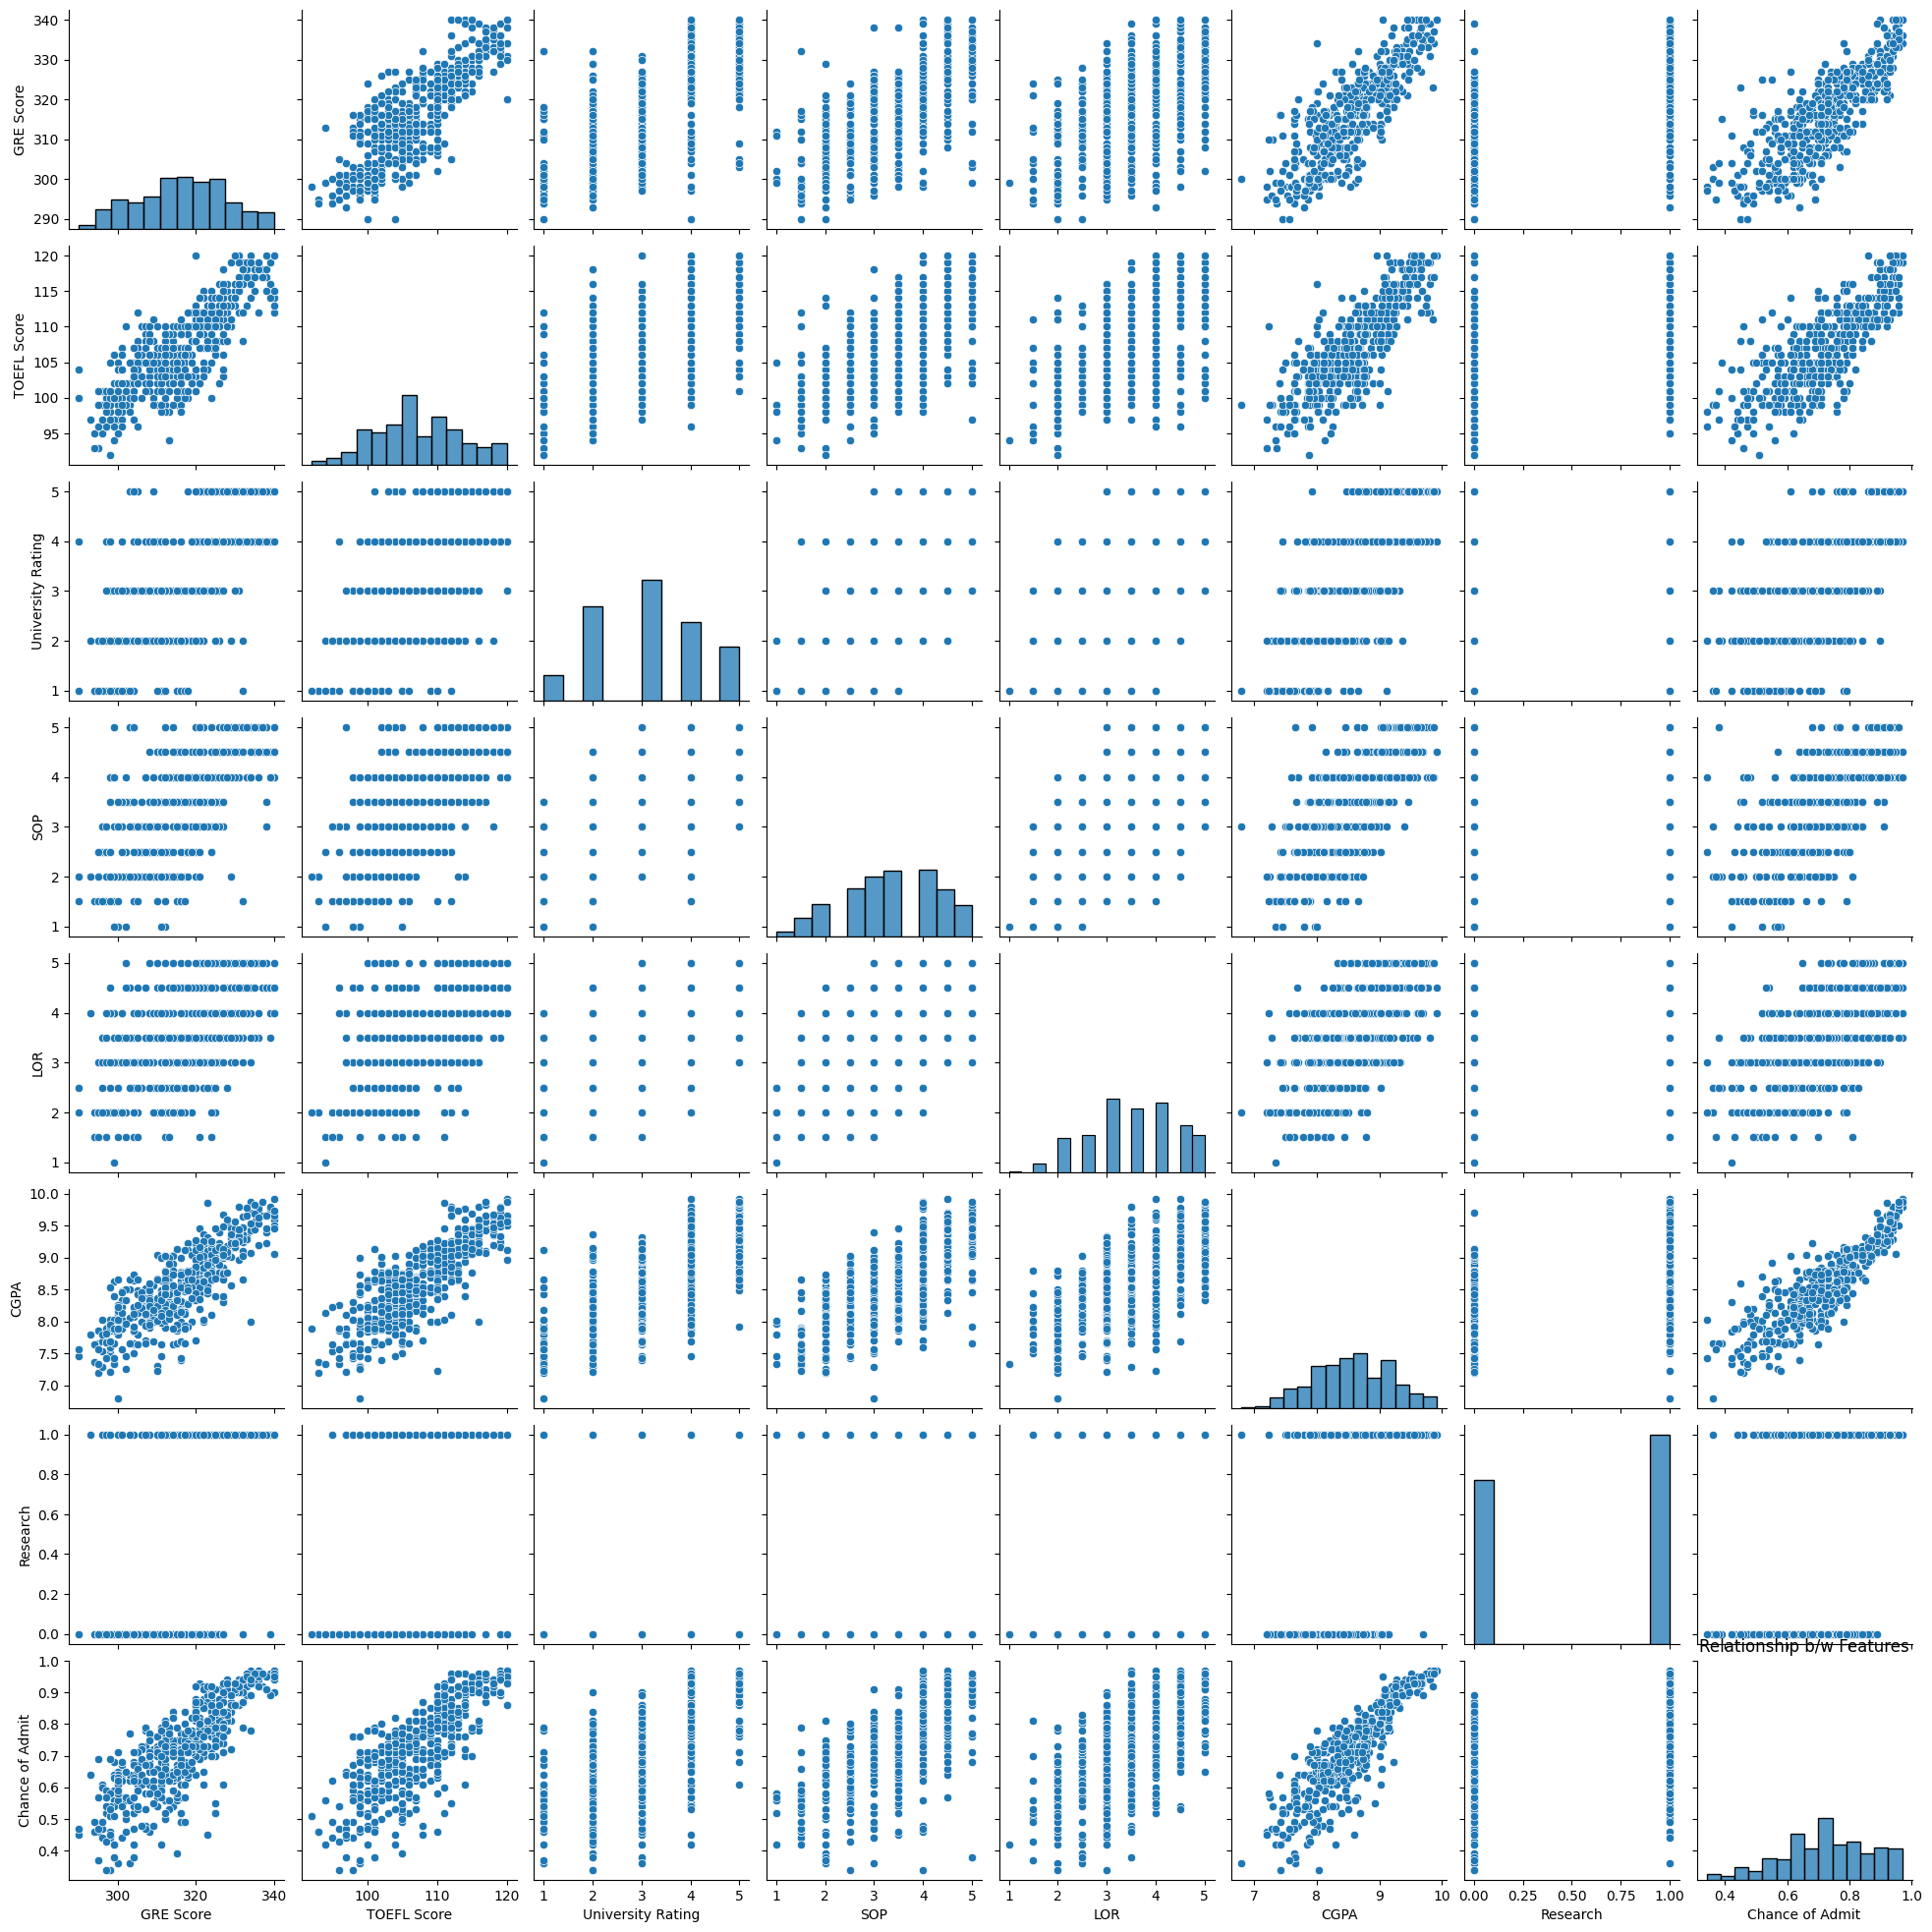

In [14]:
# Checking the overall linearity and correlation across all features using pairplot

sns.pairplot(df)
plt.title('Relationship b/w Features')
plt.show()

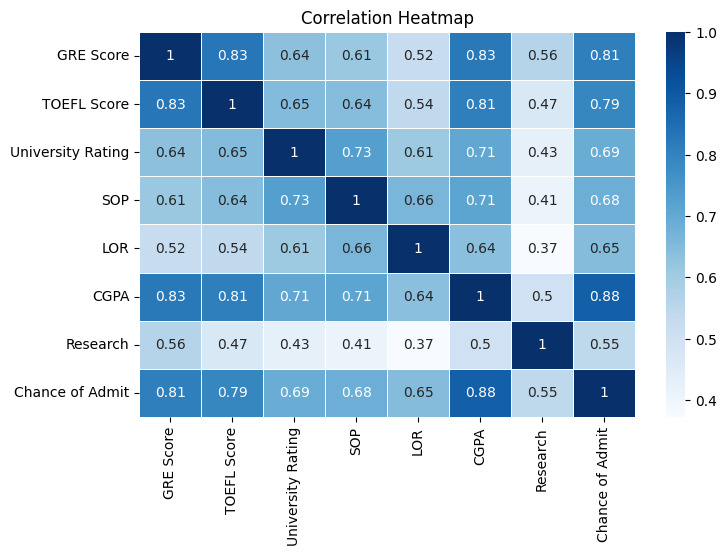

In [15]:
# Create a heatmap for the correlation matrix

plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap='Blues',edgecolors='black',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

**Insights/Conclusion:**

* Exam scores (GRE, TOEFL and CGPA) have a high positive correlation with chance of admit.

* University ranking, SOP and LOR ratings significantly influence admittance chances, while research has minimal impact.

* GRE Score, TOEFL Score and CGPA are also highly correlated among themselves.

* None of the feature has a very high correlation (>0.90) with some other feature, so we will not drop any feature.

### Univariate Analysis

In [16]:
cat_cols = ['University Rating', 'SOP', 'LOR', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA', 'Chance of Admit']

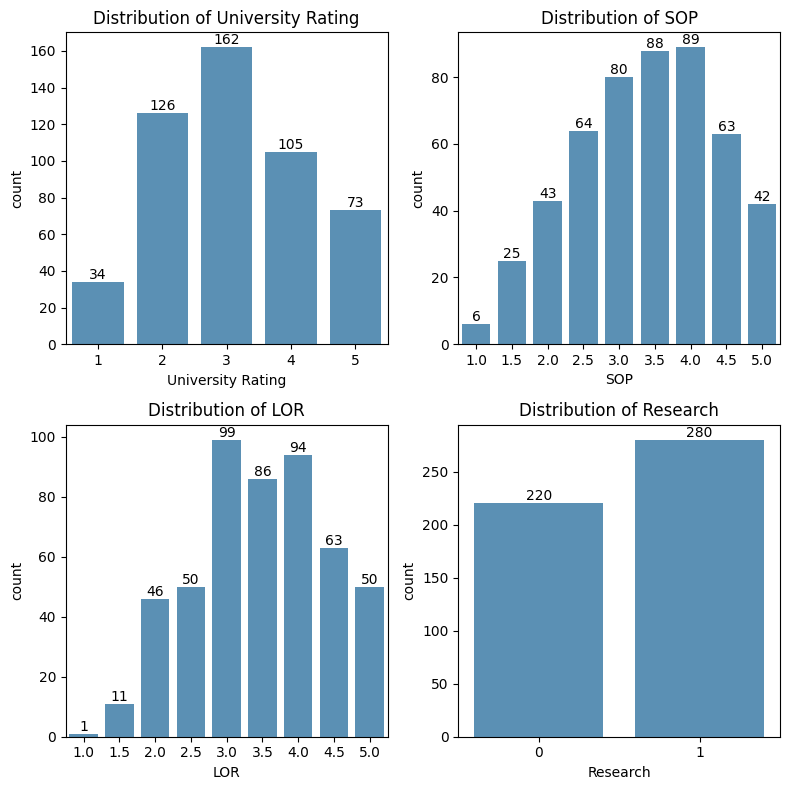

In [17]:
# Countplots for categorical variables

plt.subplots(2, 2, figsize=(8, 8))

for i, col in enumerate(cat_cols):
  ax=plt.subplot(2,2,i+1)
  sns.countplot(x=col, data=df, alpha=0.8)
  ax.bar_label(ax.containers[0], fontsize=10)
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insights/Conclusion:**

It can be observed that the most frequent value of categorical features is as following:

* **University Rating:** 3
* **SOP:** 3.5 & 4
* **LOR:** 3
* **Research:** True (1)

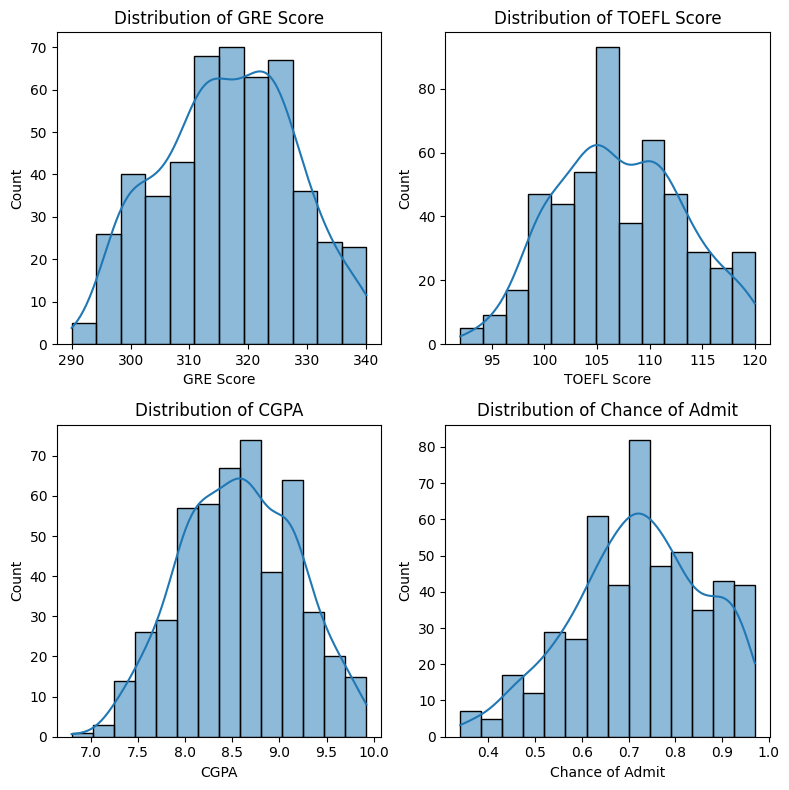

In [18]:
# Plotting histograms and KDE plots for continuous variables

plt.subplots(2, 2, figsize=(8, 8))

for i, col in enumerate(num_cols):
  ax=plt.subplot(2,2,i+1)
  sns.histplot(data=df[col], kde=True)
  plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

**Insights/Conclusion:**

* GRE scores are between 290 and 340, with maximum students scoring in the range 310-330.

* TOEFL scores are between 90 and 120, with maximum students scoring around 105.

* CGPA ranges between 7 and 10, with maximum students scoring around 8.5.

* Chance of Admit is a probability percentage between 0 and 1, with maximum students scoring around 70%-75%.

### Bivariate Analysis

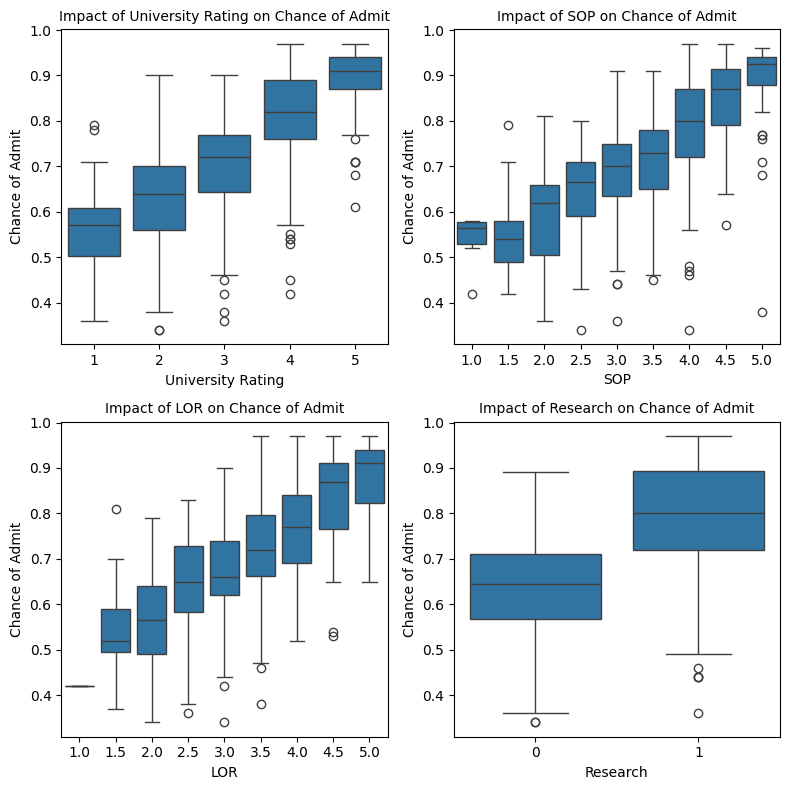

In [19]:
# Boxplots to analyse the relationship between categorical variables and Chance of Admit

plt.subplots(2, 2, figsize=(8, 8))

for i, col in enumerate(cat_cols):
  ax = plt.subplot(2,2,i+1)
  sns.boxplot(data = df, x=col, y='Chance of Admit')
  plt.title(f"Impact of {col} on Chance of Admit", fontsize=10)

plt.tight_layout()
plt.show()

**Insights/Conclusion:**

The categorical variables such as University Ranking, SOP strength, LOR strength and Research also increase the chances of admit.

## Data Preprocessing

In [20]:
# Check for duplicate records

df.duplicated().sum()

0

**Insights/Conclusion:**
There are no duplicate records in the dataset.

In [21]:
# Check for missing values in all columns

df.isna().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

**Insights/Conclusion:**
The dataset contains no null or missing values across all features.

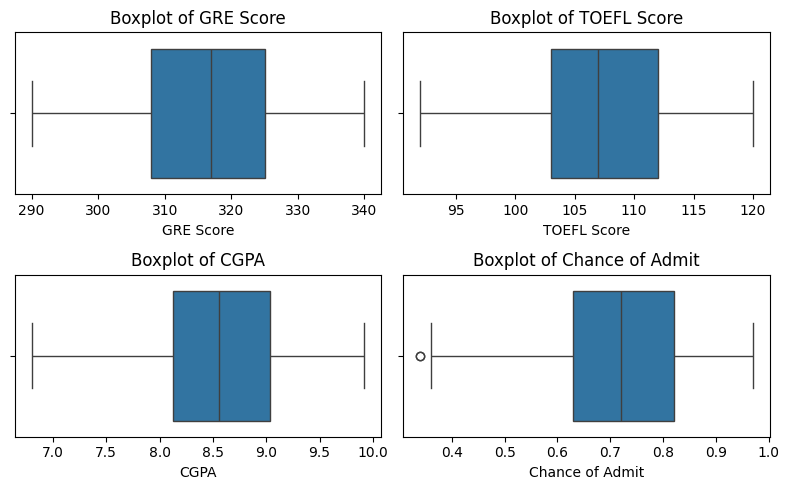

In [22]:
# Check for outliers using boxplots

plt.subplots(2, 2, figsize=(8, 5))

for i, col in enumerate(num_cols):
  ax=plt.subplot(2,2,i+1)
  sns.boxplot(data=df[col], orient='h')
  plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

**Insights/Conclusion:**
The numeric columns show no outliers, with all observations falling within the whiskers representing the mimimum and maximum values range.

## Train-Test Split

In [23]:
# Define the feature set and the target variable

X = df.drop('Chance of Admit', axis=1)
y = df['Chance of Admit']

In [24]:
X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


In [25]:
y.head()

0    0.92
1    0.76
2    0.72
3    0.80
4    0.65
Name: Chance of Admit, dtype: float64

In [26]:
from sklearn.model_selection import train_test_split

# Perform the train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of X_train: (400, 7)
Shape of X_test: (100, 7)
Shape of y_train: (400,)
Shape of y_test: (100,)


In [27]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [28]:
print(X_train_scaled[0:5])

[[0.62       0.67857143 0.5        0.625      0.71428571 0.65064103
  1.        ]
 [0.52       0.67857143 0.75       0.75       1.         0.55769231
  0.        ]
 [0.26       0.35714286 0.5        0.625      0.42857143 0.54487179
  0.        ]
 [0.48       0.53571429 0.25       0.375      0.71428571 0.47115385
  0.        ]
 [0.36       0.5        0.5        0.625      0.28571429 0.45192308
  1.        ]]


In [29]:
print(X_test_scaled[0:5])

[[0.88       0.85714286 0.75       0.75       0.57142857 0.87820513
  1.        ]
 [0.48       0.57142857 0.75       0.875      0.71428571 0.71794872
  1.        ]
 [0.5        0.46428571 0.25       0.25       0.28571429 0.2724359
  0.        ]
 [0.44       0.60714286 0.5        0.5        0.42857143 0.60576923
  0.        ]
 [0.72       0.71428571 0.5        0.625      0.42857143 0.72115385
  1.        ]]


## Base Model: Linear Regression

In [30]:
import statsmodels.api as sm

# Add a constant to the model (intercept)
X_train_scaled_const = sm.add_constant(X_train_scaled)

# Create the linear regression model
model = sm.OLS(y_train, X_train_scaled_const).fit()

# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     257.0
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          3.41e-142
Time:                        15:32:21   Log-Likelihood:                 561.91
No. Observations:                 400   AIC:                            -1108.
Df Residuals:                     392   BIC:                            -1076.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3556      0.010     36.366      0.0

**Insights/Conclusion:**

* **R-squared (0.821):** This indicates that approximately 81.9% of the variability in the `Chance of Admit` can be explained by the model. This is a high value, suggesting a good fit.

* **Adjusted R-squared (0.818):** This value adjusts the R-squared for the number of predictors in the model. It is slightly lower than the R-squared, indicating that the model is well-specified without overfitting.

* **F-statistic (257):** This is the test statistic for the overall significance of the model. Very low p-value (3.41e-142), confirming the model's statistical significance.

* Constant coefficient (0.3556) represents baseline.

* GRE Score and TOEFL Score positively impact admission chances.

* LOR, CGPA, and Research experience positively influence chances.

* SOP and University Rating show no significant impact on admission.

* **Omnibus (86.232):** Non-normality in residuals observed.

* **JB (190.099):** Lack of normality confirmed by Jarque-Bera test.

* **Durbin-Watson (2.05):** No significant autocorrelation in residuals.

* **Cond. No. (23.4):** Moderate multicollinearity is present.

In [31]:
# Get the model coefficients
coefficients = model.params

# Create a DataFrame for better readability
coef_df = pd.DataFrame({'Feature': ['Intercept'] + X.columns.tolist(), 'Coefficient': coefficients})
print(coef_df)

                 Feature  Coefficient
const          Intercept     0.355584
x1             GRE Score     0.121722
x2           TOEFL Score     0.083884
x3     University Rating     0.010275
x4                   SOP     0.007255
x5                   LOR     0.060333
x6                  CGPA     0.351085
x7              Research     0.024027


In [32]:
# Get p-values from the model summary
p_values = model.pvalues

# Identify columns with p-values greater than 0.05
high_pval_columns = p_values[p_values > 0.05].index

print(high_pval_columns)

Index(['x3', 'x4'], dtype='object')


In [33]:
# Map high p-value columns to the original DataFrame's column names
original_columns = ['GRE', 'TOEFL', 'University Rating', 'SOP', 'LOR' 'CGPA', 'Research']
columns_to_drop = [original_columns[int(col[1:]) - 1] for col in high_pval_columns]

# Drop these columns from the original training DataFrame (not the scaled version directly)
X_train_reduced = X_train.drop(columns=columns_to_drop)
X_test_reduced = X_test.drop(columns=columns_to_drop)

# Re-scale the reduced features
X_train_reduced_scaled = scaler.fit_transform(X_train_reduced)
X_test_reduced_scaled = scaler.transform(X_test_reduced)

In [34]:
print(X_train_reduced_scaled[0:5])

[[0.62       0.67857143 0.71428571 0.65064103 1.        ]
 [0.52       0.67857143 1.         0.55769231 0.        ]
 [0.26       0.35714286 0.42857143 0.54487179 0.        ]
 [0.48       0.53571429 0.71428571 0.47115385 0.        ]
 [0.36       0.5        0.28571429 0.45192308 1.        ]]


In [35]:
print(X_test_reduced_scaled[0:5])

[[0.88       0.85714286 0.57142857 0.87820513 1.        ]
 [0.48       0.57142857 0.71428571 0.71794872 1.        ]
 [0.5        0.46428571 0.28571429 0.2724359  0.        ]
 [0.44       0.60714286 0.42857143 0.60576923 0.        ]
 [0.72       0.71428571 0.42857143 0.72115385 1.        ]]


In [36]:
# Add a constant to the model (intercept) for the reduced feature set
X_train_reduced_scaled_const = sm.add_constant(X_train_reduced_scaled)

# Re-train the model
model_reduced = sm.OLS(y_train, X_train_reduced_scaled_const).fit()

# Display the summary of the new model
print(model_reduced.summary())

                            OLS Regression Results                            
Dep. Variable:        Chance of Admit   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     360.8
Date:                Fri, 07 Jun 2024   Prob (F-statistic):          1.36e-144
Time:                        15:32:21   Log-Likelihood:                 561.54
No. Observations:                 400   AIC:                            -1111.
Df Residuals:                     394   BIC:                            -1087.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3550      0.010     37.131      0.0

In [37]:
# Display model coefficients

coefficients = model_reduced.params
coef_df = pd.DataFrame({'Feature': ['Intercept'] + X_train_reduced.columns.tolist(), 'Coefficient': coefficients})
print(coef_df)

           Feature  Coefficient
const    Intercept     0.354984
x1       GRE Score     0.122674
x2     TOEFL Score     0.087933
x3             LOR     0.065434
x4            CGPA     0.358800
x5        Research     0.024601


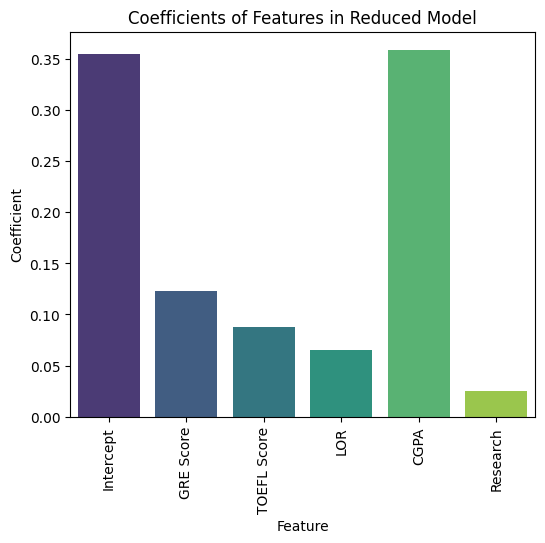

In [38]:
# Plot the coefficients

plt.figure(figsize=(6, 5))
sns.barplot(x='Feature', y='Coefficient', data=coef_df, palette='viridis')
plt.title('Coefficients of Features in Reduced Model')
plt.xticks(rotation=90)
plt.show()

**Insights/Conclusion:**

* GRE, TOEFL, and CGPA have strong positive impacts on admission chances.

* Positive recommendation letters slightly boost admission prospects.

* Research experience has a minor positive influence on admissions.

## Testing Assumptions of Linear Regression Model

### Multicollinearity check

VIF (Variance Inflation Factor) is a measure that quantifies the severity of multicollinearity in a regression analysis. It assesses how much the variance of the estimated regression coefficient is inflated due to collinearity.

The formula for VIF is as follows:

VIF(j) = 1 / (1 - R(j)^2)

Where:

* j represents the jth predictor variable.
* R(j)^2 is the coefficient of determination (R-squared) obtained from regressing the jth predictor variable on all the other predictor variables.

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X_train_reduced_scaled_df = pd.DataFrame(X_train_reduced_scaled)

vif['Features'] = X_train_reduced_scaled_df.columns
vif['VIF'] = [variance_inflation_factor(X_train_reduced_scaled_df.values, i) for i in range(X_train_reduced_scaled_df.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

print(vif)

   Features    VIF
3         3  35.92
0         0  31.08
1         1  25.86
2         2   9.19
4         4   3.32


**Insights/Conclusion:**

*  High Multicollinearity: GRE and TOEFL Scores exhibit severe multicollinearity, impacting model stability and interpretability.

*  Moderate Multicollinearity: CGPA shows significant correlation, requiring attention for model refinement.

*  Low Multicollinearity: LOR and Research are relatively independent predictors, enhancing model robustness.

### Mean of Residuals

The mean of residuals represents the average of residual values in a regression model. Residuals are the discrepancies or errors between the observed values and the values predicted by the regression model.

The mean of residuals is useful to assess the overall bias in the regression model. If the mean of residuals is close to zero, it indicates that the model is unbiased on average. However, if the mean of residuals is significantly different from zero, it suggests that the model is systematically overestimating or underestimating the observed values.

In [40]:
residuals = model_reduced.resid
mean_residuals = np.mean(residuals)
print("Mean of Residuals:", mean_residuals)

Mean of Residuals: -4.4408920985006264e-17


**Insights/Conclusion:**
Residuals mean is very close to zero, suggesting unbiased model predictions.

### Linear relationship between independent & dependent variables.

Linearity of variables in regression models assumes a linear relationship between independent variables and the dependent variable.

#### Scatter plots

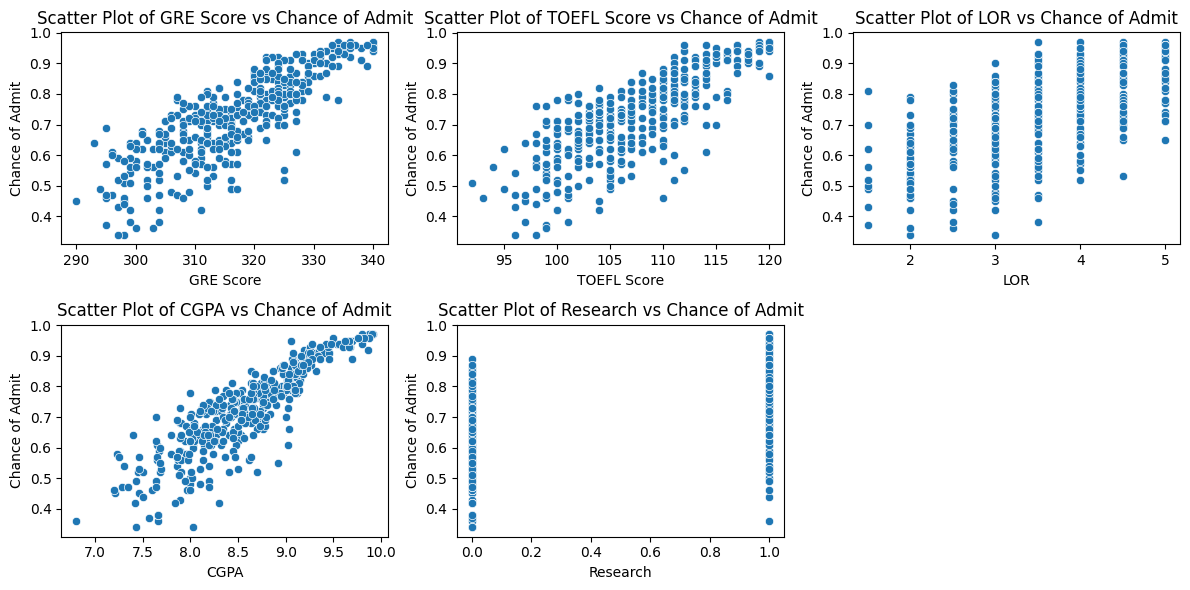

In [41]:
plt.figure(figsize=(12, 6))

for i, column in enumerate(X_train_reduced.columns):
    plt.subplot(2, 3, i+1)
    sns.scatterplot(x=X_train_reduced[column], y=y_train)
    plt.title(f'Scatter Plot of {column} vs Chance of Admit')

plt.tight_layout()
plt.show()

#### Regression plots

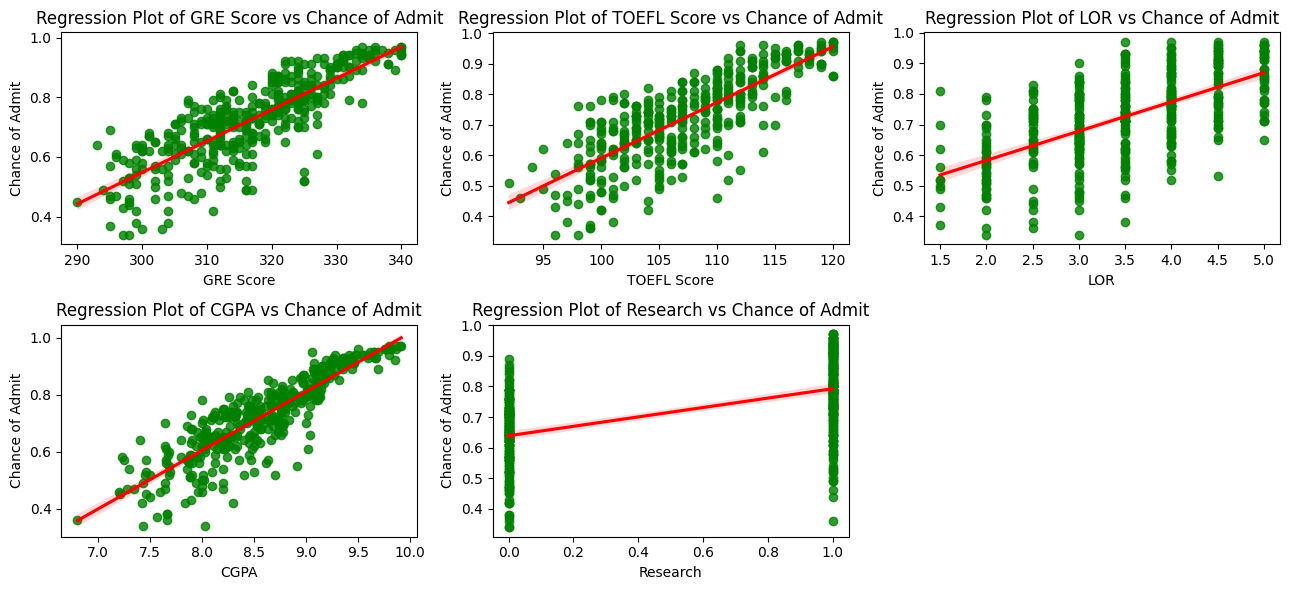

In [42]:
plt.figure(figsize=(13, 6))

for i, column in enumerate(X_train_reduced.columns):
    plt.subplot(2, 3, i+1)
    sns.regplot(x=X_train_reduced[column], y=y_train, color='green', line_kws={"color": "red"})
    plt.title(f'Regression Plot of {column} vs Chance of Admit')

plt.tight_layout()
plt.show()

#### Pearson Correlation

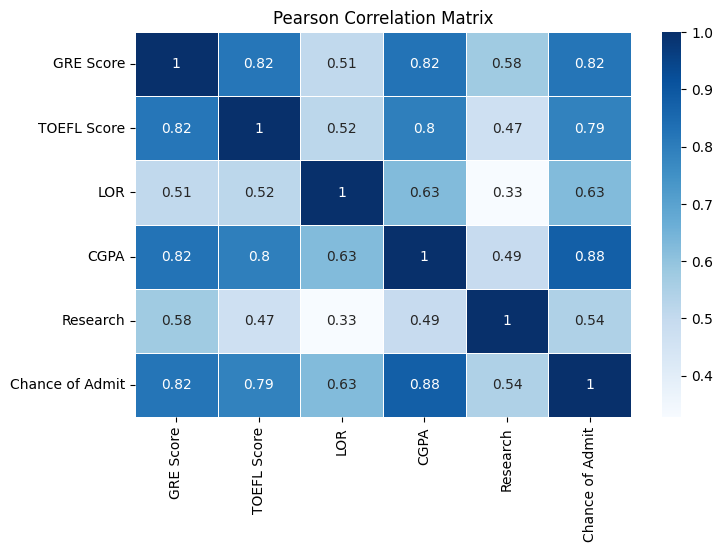

In [43]:
plt.figure(figsize=(8, 5))
sns.heatmap(X_train_reduced.join(y_train).corr(), annot=True, cmap='Blues', edgecolors='black', linewidths=0.5)
plt.title('Pearson Correlation Matrix')
plt.show()

**Insights/Conclusion:**

* Strong positive correlations exist between CGPA, GRE Score, and TOEFL Score with Chance of Admit.

* Research experience and LOR show moderate positive correlations with Chance of Admit.

* The highest correlation is observed between CGPA and Chance of Admit, indicating its significant influence on admission chances.

### Homoscedasticity

Homoscedasticity in regression analysis assumes constant residual variance across independent variables. Violation of this assumption can result in inconsistent error variability, leading to unreliable and biased regression estimates.

#### Scatterplot of residuals against predicted values

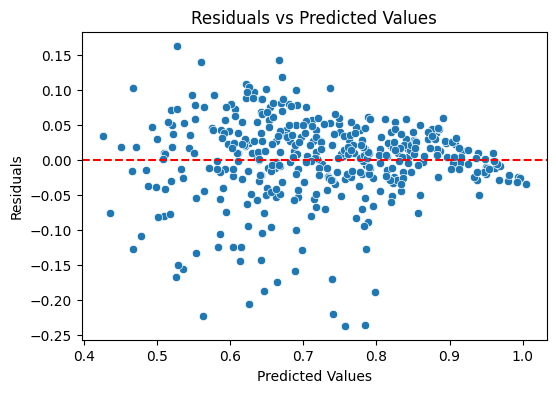

In [44]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x=model_reduced.fittedvalues, y=model_reduced.resid)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='red', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()

**Insights/Conclusion:**
Since the residual plot shows no clear pattern or trend in residuals, it suggests that the model captures linear relationships well, enhancing its reliability and predictive accuracy.

#### Goldfeld-Quandt Test

In [45]:
# Goldfeld-Quandt test for heteroscedasticity

from statsmodels.stats.diagnostic import het_goldfeldquandt

_, p_value, _ = het_goldfeldquandt(model_reduced.resid, X_train_reduced_scaled_const)
print("Goldfeld-Quandt Test p-value:", p_value)

# Interpretation
if p_value > 0.05:
    print("There is no strong evidence of heteroscedasticity and hence, the presence of Homoscedasticity is validated.")
else:
    print("Heteroscedasticity may be present in the data.")

Goldfeld-Quandt Test p-value: 0.613902484588438
There is no strong evidence of heteroscedasticity and hence, the presence of Homoscedasticity is validated.


### Normality of residuals

#### Histogram of residuals

Plot a histogram of the residuals. If the distribution resembles a bell-shaped curve, it suggests that the residuals are normally distributed.

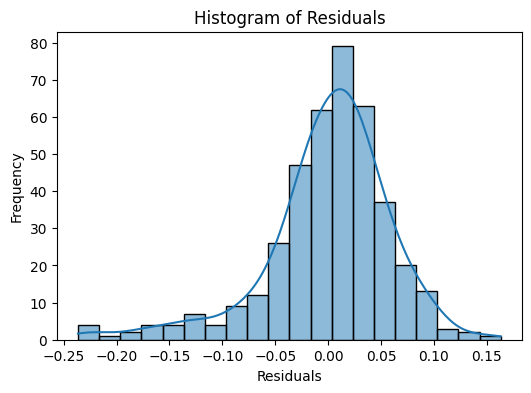

In [46]:
plt.figure(figsize=(6, 4))
sns.histplot(model_reduced.resid, kde=True, bins=20)
plt.title('Histogram of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

**Insights/Conclusion:**
The histogram shows that there is a negative skew in the distribution of residuals but it is close to a normal distribution.



#### Q-Q plot of residuals

Plot the quantiles of the residuals against the quantiles of a theoretical normal distribution. If the points fall approximately along the diagonal line, it indicates that the residuals follow a normal distribution.

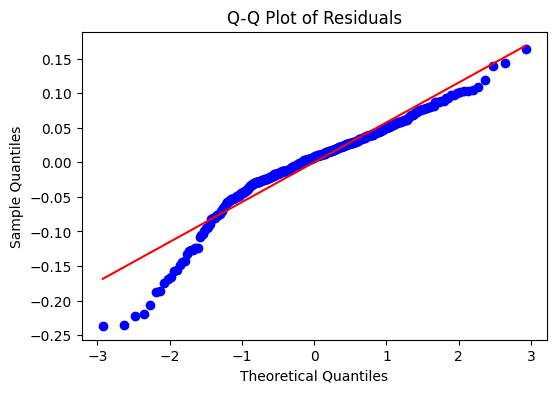

In [47]:
plt.figure(figsize=(6, 4))
stats.probplot(model_reduced.resid, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

**Insights/Conclusion:**
The QQ plot shows that residuals are slightly deviating from the straight diagonal.



## Evaluate the model's performance

In [48]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predict the target variable using the reduced model
y_pred = model_reduced.predict(X_train_reduced_scaled_const)

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_train, y_pred)

# Root Mean Square Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_train, y_pred))

# R-squared value
r2 = r2_score(y_train, y_pred)

# Adjusted R-squared value
n = X_train_reduced.shape[0]  # Number of samples
p = X_train_reduced.shape[1]  # Number of predictors
adj_r2 = 1 - (1 - r2) * ((n - 1) / (n - p - 1))

print("Mean Absolute Error (MAE):", mae)
print("Root Mean Square Error (RMSE):", rmse)
print("R-squared value:", r2)
print("Adjusted R-squared value:", adj_r2)

Mean Absolute Error (MAE): 0.04269126483606397
Root Mean Square Error (RMSE): 0.05944028044169098
R-squared value: 0.8207326947514394
Adjusted R-squared value: 0.8184577289487927


**Insights/Conclusion:**

*  **MAE:** Model's average prediction error is 0.043, indicating closeness of predictions to actual values.

*  **RMSE:** Predictions deviate by 0.059 on average, reflecting precision.

*  **R-squared:** Model explains 82.07% of variance, suggesting strong explanatory power.

*  **Adjusted R-squared:** Even after adjusting for predictors, model's explanatory ability remains high (81.84%).

## Insights & Recommendations

### Insights

*  **Model Accuracy:** The model's high R-squared value (0.821) indicates strong predictive accuracy, explaining 82.1% of the variance in admission chances.


*  **Key Predictors:** GRE, TOEFL and CGPA scores are significant predictors, strongly impacting the probability of admission.

*  **Research Impact:** Research experience positively influences admission chances, though to a lesser extent than GRE, TOEFL and CGPA scores.

*  **Insignificant Factors:** SOP and University Rating are not statistically significant predictors in the final linear regression model.

*  **Influence of LOR:** Positive but minor influence of strong letters of recommendation on the likelihood of admission.

*  **Multicollinearity Issue:** High multicollinearity between GRE and TOEFL scores, potentially affecting model stability and interpretability.

*  **Model Residuals:** Residuals show no clear pattern, suggesting homoscedasticity and good model fit without systematic error variance.

*  **Normal Distribution:** Residuals are close to normally distributed, with minor deviations, as confirmed by histograms and Q-Q plots.

*  **MAE and RMSE:** Low MAE (0.043) and RMSE (0.059) indicate high accuracy and precision in model predictions.

*  **Adjusted R-squared:** High adjusted R-squared (0.818) shows the model retains strong explanatory power after accounting for predictor variables.

### Recommendations

* **Emphasize Test Preparation:** Given the significant impact of GRE and TOEFL scores on admission chances, it is crucial to enhance preparation programs for these exams. Implement intensive coaching sessions, provide access to practice tests, and develop personalized study plans to help students achieve higher scores.

* **Support Academic Performance:** Since CGPA is a strong predictor of admission success, introduce academic support initiatives such as tutoring services, study groups, and workshops focusing on effective study techniques. These measures will assist students in maintaining or improving their academic performance.

* **Encourage Research Engagement:** Foster student participation in research projects by partnering with universities and research institutions. Providing resources and opportunities for research experience will positively influence students' admission prospects.

* **Optimize Application Documents:** Strengthen guidance on crafting compelling statements of purpose (SOP) and obtaining strong letters of recommendation (LOR). Conduct workshops, offer one-on-one counseling, and provide examples of successful application documents to ensure students present their best selves in their applications.

* **Expand Independent Variables:** To enhance the predictive accuracy of the admission model, incorporate additional independent variables such as work experience, internships, mock interview performance, extracurricular activities, and diversity factors. These variables can provide a more comprehensive view of an applicant's profile, thereby improving prediction reliability and offering more tailored advising services.

By implementing these recommendations, Jamboree Education can better support students in their pursuit of admission to top colleges, ensuring a more robust and accurate prediction model while providing comprehensive and personalized guidance.